## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [3]:
columns = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'price'
]

#df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df = pd.read_csv('data/data-week2.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [4]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### Fill NAs with 0

In [5]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No need to use fillna()

#### Apply log transform to price & remove it from original data frame

In [6]:
y = np.log1p(df['price'])
y.head()

0    5.010635
1    5.420535
2    5.017280
3    4.499810
4    4.394449
Name: price, dtype: float64

In [7]:
del df['price']
df.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0


#### Do train/validation/test split with 60%/20%/20% distribution. 
Use the train_test_split function and set the random_state parameter to 1

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_train_full, df_test, y_train_full, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

In [10]:
df_train, df_valid, y_train, y_valid = train_test_split(df_train_full, y_train_full, test_size=df_test.shape[0], random_state=1)

In [11]:
print(df.shape[0] == df_train.shape[0] + df_valid.shape[0] + df_test.shape[0])
print(df.shape[0] == df_train_full.shape[0] + df_test.shape[0])

True
True


Now, use `DictVectorizer` to turn train and validation into matrices:

In [12]:
from sklearn.feature_extraction import DictVectorizer

In [13]:
dv = DictVectorizer(sparse=False)

In [14]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

valid_dict = df_valid.to_dict(orient='records')
X_valid = dv.transform(valid_dict)

In [15]:
dv.feature_names_

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
dtree_model = DecisionTreeRegressor(max_depth=1)

In [18]:
dtree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

In [19]:
from sklearn.tree import export_text

In [20]:
print(export_text(dtree_model, feature_names=dv.feature_names_))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



> ANSWER: the feature used to split the data is `room-type`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rforest_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [23]:
rforest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

#### RMSE

$ rmse = \sqrt{mse} = \sqrt{ \frac{1}{m} \sum_{i=1}^{m}{(se_i)^2} } = \sqrt{ \frac{1}{m} \sum_{i=1}^{m}{(y_i - \hat{y_i})^2} }$

In [24]:
def RMSE(y_true, y_pred):
    se = (y_true - y_pred)**2
    mse = np.mean(se)
    return np.sqrt(mse)

In [25]:
y_pred = rforest_model.predict(X_valid)
y_pred

array([4.8782275 , 4.79199459, 5.49902928, ..., 5.03652684, 4.72644125,
       5.41201993])

In [27]:
RMSE(y_valid, y_pred).round(4)

0.4599

> ANSWER: the RMSE for this model on the validation set is `0.459`

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [28]:
from tqdm import tqdm, notebook

In [29]:
rmse_scores_Q3 = {}

for ne in notebook.tqdm(np.linspace(10,200,20)):
    
    rforest_model = RandomForestRegressor(n_estimators=int(ne), random_state=1, n_jobs=-1)
    rforest_model.fit(X_train, y_train)
    y_pred = rforest_model.predict(X_valid)
    rmse = RMSE(y_valid, y_pred)
    
    tqdm.write(f"n_estimators: {ne} - RMSE: {rmse:.4f}")
    rmse_scores_Q3[ne] = rmse

  0%|          | 0/20 [00:00<?, ?it/s]

n_estimators: 10.0 - RMSE: 0.4599
n_estimators: 20.0 - RMSE: 0.4478
n_estimators: 30.0 - RMSE: 0.4451
n_estimators: 40.0 - RMSE: 0.4432
n_estimators: 50.0 - RMSE: 0.4422
n_estimators: 60.0 - RMSE: 0.4415
n_estimators: 70.0 - RMSE: 0.4409
n_estimators: 80.0 - RMSE: 0.4408
n_estimators: 90.0 - RMSE: 0.4402
n_estimators: 100.0 - RMSE: 0.4398
n_estimators: 110.0 - RMSE: 0.4393
n_estimators: 120.0 - RMSE: 0.4391
n_estimators: 130.0 - RMSE: 0.4393
n_estimators: 140.0 - RMSE: 0.4391
n_estimators: 150.0 - RMSE: 0.4391
n_estimators: 160.0 - RMSE: 0.4389
n_estimators: 170.0 - RMSE: 0.4389
n_estimators: 180.0 - RMSE: 0.4391
n_estimators: 190.0 - RMSE: 0.4389
n_estimators: 200.0 - RMSE: 0.4389


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

Text(0, 0.5, 'RMSE')

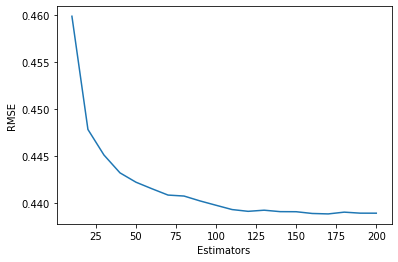

In [30]:
plt.plot(rmse_scores_Q3.keys(), rmse_scores_Q3.values())
plt.xlabel("Estimators")
plt.ylabel("RMSE")

> ANSWER: The RMSE stop improving around `120` estimators

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [31]:
rmse_scores_Q4 = {}

for max_d in notebook.tqdm([10,15,20,25]):
    rmse_scores_Q4[max_d] = {}
    for ne in notebook.tqdm(np.linspace(10,200,20)):
        
        rforest_model = RandomForestRegressor(n_estimators=int(ne), random_state=1, n_jobs=-1, max_depth=max_d)
        rforest_model.fit(X_train, y_train)
        y_pred = rforest_model.predict(X_valid)
        rmse = RMSE(y_valid, y_pred)

        tqdm.write(f"n_estimators: {ne} - max_depth: {max_d} - RMSE: {rmse}")
        rmse_scores_Q4[max_d][int(ne)] = rmse

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

n_estimators: 10.0 - max_depth: 10 - RMSE: 0.445596171749275
n_estimators: 20.0 - max_depth: 10 - RMSE: 0.44203282715576686
n_estimators: 30.0 - max_depth: 10 - RMSE: 0.4413920618234788
n_estimators: 40.0 - max_depth: 10 - RMSE: 0.44154053612675453
n_estimators: 50.0 - max_depth: 10 - RMSE: 0.4411204060832355
n_estimators: 60.0 - max_depth: 10 - RMSE: 0.44109567579839254
n_estimators: 70.0 - max_depth: 10 - RMSE: 0.4408047570608675
n_estimators: 80.0 - max_depth: 10 - RMSE: 0.44063392403596924
n_estimators: 90.0 - max_depth: 10 - RMSE: 0.44036005791386457
n_estimators: 100.0 - max_depth: 10 - RMSE: 0.44014389763440204
n_estimators: 110.0 - max_depth: 10 - RMSE: 0.44005376814946023
n_estimators: 120.0 - max_depth: 10 - RMSE: 0.4398402482041807
n_estimators: 130.0 - max_depth: 10 - RMSE: 0.43987437072357427
n_estimators: 140.0 - max_depth: 10 - RMSE: 0.4398662292538334
n_estimators: 150.0 - max_depth: 10 - RMSE: 0.43968896394852663
n_estimators: 160.0 - max_depth: 10 - RMSE: 0.4396447222

  0%|          | 0/20 [00:00<?, ?it/s]

n_estimators: 10.0 - max_depth: 15 - RMSE: 0.4498175486561694
n_estimators: 20.0 - max_depth: 15 - RMSE: 0.44080416870506284
n_estimators: 30.0 - max_depth: 15 - RMSE: 0.4394399501233965
n_estimators: 40.0 - max_depth: 15 - RMSE: 0.43879194239068187
n_estimators: 50.0 - max_depth: 15 - RMSE: 0.4381084280548172
n_estimators: 60.0 - max_depth: 15 - RMSE: 0.43775747746327964
n_estimators: 70.0 - max_depth: 15 - RMSE: 0.43738503419468694
n_estimators: 80.0 - max_depth: 15 - RMSE: 0.43726848667661466
n_estimators: 90.0 - max_depth: 15 - RMSE: 0.4368704327073059
n_estimators: 100.0 - max_depth: 15 - RMSE: 0.43654361439480677
n_estimators: 110.0 - max_depth: 15 - RMSE: 0.43628759495649394
n_estimators: 120.0 - max_depth: 15 - RMSE: 0.43623226968337897
n_estimators: 130.0 - max_depth: 15 - RMSE: 0.43632851739490763
n_estimators: 140.0 - max_depth: 15 - RMSE: 0.43624458339022953
n_estimators: 150.0 - max_depth: 15 - RMSE: 0.4362820924966425
n_estimators: 160.0 - max_depth: 15 - RMSE: 0.43609827

  0%|          | 0/20 [00:00<?, ?it/s]

n_estimators: 10.0 - max_depth: 20 - RMSE: 0.4597643861421082
n_estimators: 20.0 - max_depth: 20 - RMSE: 0.4468063850758519
n_estimators: 30.0 - max_depth: 20 - RMSE: 0.4441010161313461
n_estimators: 40.0 - max_depth: 20 - RMSE: 0.4423579078833037
n_estimators: 50.0 - max_depth: 20 - RMSE: 0.44131572254332624
n_estimators: 60.0 - max_depth: 20 - RMSE: 0.4405547615283166
n_estimators: 70.0 - max_depth: 20 - RMSE: 0.43999872409572066
n_estimators: 80.0 - max_depth: 20 - RMSE: 0.43993247325790047
n_estimators: 90.0 - max_depth: 20 - RMSE: 0.43929852062550573
n_estimators: 100.0 - max_depth: 20 - RMSE: 0.4388036787970188
n_estimators: 110.0 - max_depth: 20 - RMSE: 0.4383648882372162
n_estimators: 120.0 - max_depth: 20 - RMSE: 0.43823827664148063
n_estimators: 130.0 - max_depth: 20 - RMSE: 0.4382844333857575
n_estimators: 140.0 - max_depth: 20 - RMSE: 0.43805645979386504
n_estimators: 150.0 - max_depth: 20 - RMSE: 0.43799819016463676
n_estimators: 160.0 - max_depth: 20 - RMSE: 0.43779725581

  0%|          | 0/20 [00:00<?, ?it/s]

n_estimators: 10.0 - max_depth: 25 - RMSE: 0.46070004844483997
n_estimators: 20.0 - max_depth: 25 - RMSE: 0.4479231675227825
n_estimators: 30.0 - max_depth: 25 - RMSE: 0.44493573688024735
n_estimators: 40.0 - max_depth: 25 - RMSE: 0.44320423239471296
n_estimators: 50.0 - max_depth: 25 - RMSE: 0.4424568587096234
n_estimators: 60.0 - max_depth: 25 - RMSE: 0.44180306869726593
n_estimators: 70.0 - max_depth: 25 - RMSE: 0.44123273567773047
n_estimators: 80.0 - max_depth: 25 - RMSE: 0.44113477672978463
n_estimators: 90.0 - max_depth: 25 - RMSE: 0.4405432448502724
n_estimators: 100.0 - max_depth: 25 - RMSE: 0.44021465951348787
n_estimators: 110.0 - max_depth: 25 - RMSE: 0.43961932859919717
n_estimators: 120.0 - max_depth: 25 - RMSE: 0.43937034856487917
n_estimators: 130.0 - max_depth: 25 - RMSE: 0.43951212060887535
n_estimators: 140.0 - max_depth: 25 - RMSE: 0.4392641595142541
n_estimators: 150.0 - max_depth: 25 - RMSE: 0.4391976006190898
n_estimators: 160.0 - max_depth: 25 - RMSE: 0.43906962

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

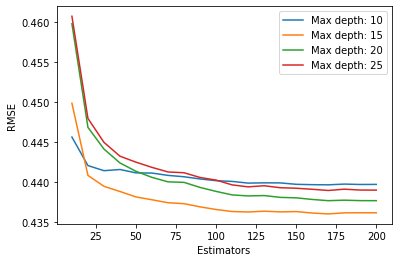

In [33]:
for k,v in rmse_scores_Q4.items():
    plt.plot(v.keys(), v.values(), label=f"Max depth: {k}")
    
plt.xlabel("Estimators")
plt.ylabel("RMSE")
plt.legend()

> ANSWER: The best max_depth seems to be `15`

> ANSWER BONUS: No that doesn't really change the result

Test with 42 as seed

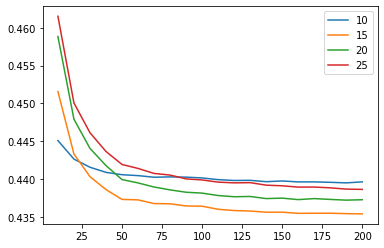

In [185]:
for k,v in rmse_scores.items():
    plt.plot(v.keys(), v.values(), label=k)
    
plt.legend()

Test without random_state

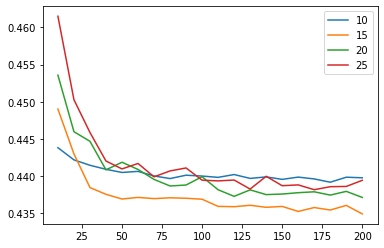

In [187]:
for k,v in rmse_scores.items():
    plt.plot(v.keys(), v.values(), label=k)
    
plt.legend()

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [34]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [35]:
rforest_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth=20)
rforest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [36]:
rforest_model.feature_importances_

array([7.65657560e-02, 3.02638819e-02, 1.51755500e-01, 1.53475601e-01,
       5.31695975e-02, 4.47273475e-04, 1.11450114e-03, 3.40436593e-02,
       1.03414350e-03, 8.37127171e-05, 4.25185232e-02, 5.45945765e-02,
       3.91898023e-01, 4.87707077e-03, 4.15817992e-03])

In [37]:
dv.feature_names_

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

In [38]:
pd.Series(rforest_model.feature_importances_, index=dv.feature_names_).sort_values(ascending=False)

room_type=Entire home/apt            0.391898
longitude                            0.153476
latitude                             0.151756
availability_365                     0.076566
reviews_per_month                    0.054595
minimum_nights                       0.053170
number_of_reviews                    0.042519
neighbourhood_group=Manhattan        0.034044
calculated_host_listings_count       0.030264
room_type=Private room               0.004877
room_type=Shared room                0.004158
neighbourhood_group=Brooklyn         0.001115
neighbourhood_group=Queens           0.001034
neighbourhood_group=Bronx            0.000447
neighbourhood_group=Staten Island    0.000084
dtype: float64

> ANSWER: it appears that `room_type=Entire home/apt` is the most important feature

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [39]:
import xgboost as xgb

#### Create DMatrix for train and validation

In [40]:
features = dv.get_feature_names()
df_train_xgb = xgb.DMatrix(X_train, label=y_train, feature_names=features)
df_valid_xgb = xgb.DMatrix(X_valid, label=y_valid, feature_names=features)

#### Create a watchlist

In [41]:
watchlist = [(df_train_xgb, 'train'), (df_valid_xgb, 'val')]

#### Train a model with these parameters for 100 rounds

In [42]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    #'objective': 'binary:logistic', # <-- for binary classification
    #'eval_metric': 'auc',           # <-- for binary classification, default according to objective
    
    'objective': 'reg:squarederror', # <-- for regression 
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

num_rounds = 100

In [43]:
class xgb_progress(xgb.callback.TrainingCallback):
    """ Custom class used to create tqdm callbacks with XGBoost
        example: xgb_progressbar = xgb_progress(num_rounds)
                 xgb.train( ... , callbacks=[xgb_progressbar])
    """
    
    def __init__(self, rounds):
        self.rounds = rounds
        self.pbar = notebook.tqdm(total=rounds)
        
    def after_iteration(self, model, epoch, evals_log):
        self.pbar.update(1)

In [44]:
xgb_progressbar = xgb_progress(num_rounds)

progress = dict()

xgb_model = xgb.train(
                        xgb_params, 
                        df_train_xgb, 
                        num_boost_round=num_rounds, 
                        verbose_eval=0, 
                        evals=watchlist,
                        callbacks=[xgb_progressbar],
                        evals_result=progress,
                        )

  0%|          | 0/100 [00:00<?, ?it/s]

In [45]:
progress['train']['rmse'][:15]

[3.027517,
 2.146669,
 1.538784,
 1.125569,
 0.851002,
 0.674904,
 0.566867,
 0.504475,
 0.469134,
 0.45009,
 0.439117,
 0.433272,
 0.429357,
 0.426681,
 0.424629]

Text(0, 0.5, 'RMSE')

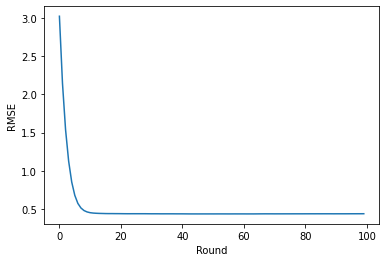

In [46]:
plt.plot(progress['val']['rmse'])
plt.xlabel("Round")
plt.ylabel("RMSE")

Now change `eta` first to `0.1` and then to `0.01`

In [47]:
xgb_progressbar = xgb_progress(num_rounds*3)

rmse_scores_Q6 = {}

for eta_v in [0.01, 0.1, 0.3]:
    
    progress = dict()

    xgb_params['eta'] = eta_v

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        verbose_eval=0, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    rmse_scores_Q6[eta_v] = progress['val']['rmse']

  0%|          | 0/300 [00:00<?, ?it/s]

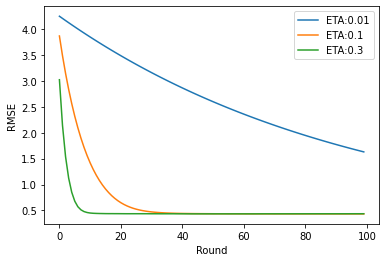

In [48]:
for k,v in rmse_scores_Q6.items():
    plt.plot(v, label=f"ETA:{k}")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.legend()

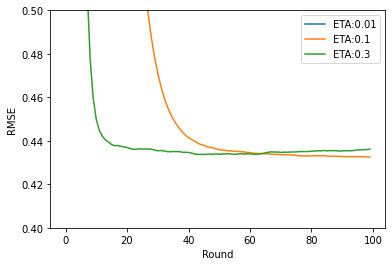

In [49]:
for k,v in rmse_scores_Q6.items():
    plt.plot(v, label=f"ETA:{k}")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.ylim(0.4, 0.5)
plt.legend()

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

In [55]:
for k,v in rmse_scores_Q6.items():
    print(f"eta:{k} - min rmse:{min(v)}")

eta:0.01 - min rmse:1.630453
eta:0.1 - min rmse:0.432497
eta:0.3 - min rmse:0.433713


> ANSWER: The eta value that leads to the best RMSE score is `0.1`.

**However a low RMSA score isn't the only critera to find a goof value for eta or other parameters...**

The 0.3 eta provide almost the same RMSE and reach it faster without really increasing by the end of the test, so all in all I would go with this one in real project.